## **The Notebook contains the answers and supporting analysis of the two Problems with following assumptions**

### **Assumptions**

#### a) All the events are associated with one specific Advertiser(or at least same ad subcategory) and Publisher. Else there will be biased comparison amongst different bid price and the associated win rate(some ads are comparative less demanding, so the average highest bid price may lower and vice-versa)
#### b) Based on the input the upper bound amount of advertiser is willing to pay for a win is 0.50
#### c) There is no other experimented bid_price points other than the mentioned in the data
#### d) There might be domain(real time bidding) specific optimization algorithm, however with time constraint a simple analytical solution is proposed



In [1]:
import pandas as pd
import json
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## *Problem 1*

In [2]:
df = pd.DataFrame([
{"app": "A", "bid_price": 0.01, "win": 0, "events": 100000}, 
{"app": "A", "bid_price": 0.01, "win": 1, "events": 0}, 
{"app": "A", "bid_price": 0.1, "win": 0, "events": 7000}, 
{"app": "A", "bid_price": 0.1, "win": 1, "events": 3000}, 
{"app": "A", "bid_price": 0.2, "win": 0, "events": 8000000}, 
{"app": "A", "bid_price": 0.2, "win": 1, "events": 2000000}, 
{"app": "A", "bid_price": 0.4, "win": 0, "events": 700000}, 
{"app": "A", "bid_price": 0.4, "win": 1, "events": 300000}, 
{"app": "A", "bid_price": 0.5, "win": 0, "events": 80000}, 
{"app": "A", "bid_price": 0.5, "win": 1, "events": 20000}, 
{"app": "A", "bid_price": 0.75, "win": 0, "events": 7000}, 
{"app": "A", "bid_price": 0.75, "win": 1, "events": 3000}, 
{"app": "A", "bid_price": 1, "win": 0, "events": 400}, 
{"app": "A", "bid_price": 1, "win": 1, "events": 600}, 
{"app": "A", "bid_price": 2, "win": 0, "events": 30}, 
{"app": "A", "bid_price": 2, "win": 1, "events": 70}, 
{"app": "A", "bid_price": 5, "win": 0, "events": 2}, 
{"app": "A", "bid_price": 5, "win": 1, "events": 8}, 
{"app": "A", "bid_price": 9, "win": 0, "events": 0}, 
{"app": "A", "bid_price": 9, "win": 1, "events": 1}])
df.head(5)

,app,bid_price,win,events
0,A,0.01,0,100000
1,A,0.01,1,0
2,A,0.10,0,7000
3,A,0.10,1,3000
4,A,0.20,0,8000000


### **Bayes’ Theorem to arrive expected win rate**

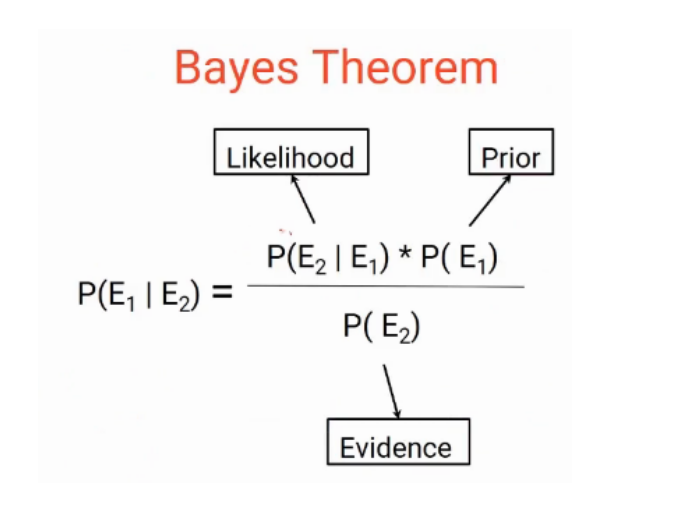
- **Inputs**
###### a) prior- The win rate for each bid price based on the seen experiments
e.g. P(WINbid price = 0.1)
###### b) Likelihood- Probability of observing the bid price conditional on Win events
e.g. P(bid price = 0.1 | WIN)
###### c) Evidence/Marginal - Probability of observing the bid price
e.g. P(bid price = 0.1) = P(WINbid price = 0.1) *P(bid price = 0.1 | WIN) + P(WINbid price = 0.1) *P(bid price = 0.1 | WIN)


- **Output**
###### Posterior Probability - Expected posterior probability/ win rate
e.g. P(WIN | bid price = 0.1 )


**Step by step calculation** 




In [3]:
bid_price_df = pd.DataFrame(pd.crosstab(index=df['bid_price'], columns=df['win'],values=df['events'],aggfunc=np.sum).reset_index()\
.rename_axis(None, axis=1).rename(columns={0:'loss',1:'win'}))
bid_price_df['total_events'] = bid_price_df.iloc[:,1:3].sum(axis=1)
bid_price_df['win_rate_prior'] = bid_price_df['win'] / bid_price_df['total_events']
bid_price_df['loss_rate_prior'] = bid_price_df['loss'] / bid_price_df['total_events']
bid_price_df['win_liklihood'] = bid_price_df['win']/bid_price_df['win'].sum(axis=0)
bid_price_df['loss_liklihood'] = bid_price_df['loss']/bid_price_df['loss'].sum(axis=0)
bid_price_df['evidence'] = bid_price_df['win_liklihood'] * bid_price_df['win_rate_prior'] + bid_price_df['loss_liklihood'] * bid_price_df['loss_rate_prior']
bid_price_df['support'] = bid_price_df['total_events'] / bid_price_df['total_events'].sum(axis=0)
bid_price_df['posterior_win_rate'] = (bid_price_df['win_rate_prior'] * bid_price_df['win_liklihood'])/bid_price_df['evidence']
bid_price_df.head(10)

,bid_price,loss,win,total_events,win_rate_prior,loss_rate_prior,win_liklihood,loss_liklihood,evidence,support,posterior_win_rate
0,0.01,100000,0,100000,0.0,1.0,0.000000e+00,1.124299e-02,1.124299e-02,8.911774e-03,0.000000
1,0.10,7000,3000,10000,0.3,0.7,1.289391e-03,7.870092e-04,9.377239e-04,8.911774e-04,0.412507
2,0.20,8000000,2000000,10000000,0.2,0.8,8.595943e-01,8.994391e-01,8.914701e-01,8.911774e-01,0.192849
3,0.40,700000,300000,1000000,0.3,0.7,1.289391e-01,7.870092e-02,9.377239e-02,8.911774e-02,0.412507
4,0.50,80000,20000,100000,0.2,0.8,8.595943e-03,8.994391e-03,8.914701e-03,8.911774e-03,0.192849
5,0.75,7000,3000,10000,0.3,0.7,1.289391e-03,7.870092e-04,9.377239e-04,8.911774e-04,0.412507
6,1.00,400,600,1000,0.6,0.4,2.578783e-04,4.497196e-05,1.727158e-04,8.911774e-05,0.895847
7,2.00,30,70,100,0.7,0.3,3.008580e-05,3.372897e-06,2.207193e-05,8.911774e-06,0.954156
8,5.00,2,8,10,0.8,0.2,3.438377e-06,2.248598e-07,2.795674e-06,8.911774e-07,0.983914
9,9.00,0,1,1,1.0,0.0,4.297971e-07,0.000000e+00,4.297971e-07,8.911774e-08,1.000000


## *Problem 2*

Text(0, 0.5, 'Expected Win Rate')

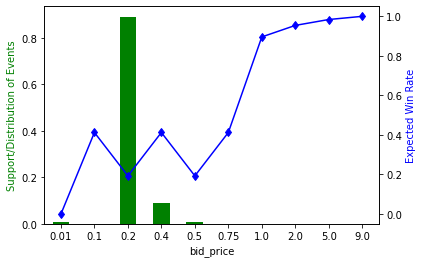

In [24]:
ax=bid_price_df.groupby('bid_price').support.sum().plot(kind='bar',color='g')
ax2 = bid_price_df['posterior_win_rate'].plot(secondary_y=True,xlim=ax.get_xlim(),marker='d',color='b')
ax.set_ylabel('Support/Distribution of Events', color='g')
ax2.set_ylabel('Expected Win Rate', color='b')

#### A) There is no monotonic relationship between bid price and win rate(amongst the Bid Price points with significant support or no of events)
#### B) Bid Price 0.20 and 0.40 constitutes of > 98% of total bid events. Also there is no experimentation in in other values between 0.20 and 0.40.
#### C) Although for bid price 0.1 there is higher expected win rate than 0.20, there is insignificant support/data points compared to 0.20 or 0.40 bid price.So more experimentation in this price region can provide more confidence in the decisioning process.

 

#### Analytical Approach to decide optimal bid price

- As there is no clear trend on between bid price and win rate(mostly because of heterogeneity of the no of events at different  bid price/lack of support as discussed above) we can't regress win rate w.r.t. price.Even with only 10 data points the regression fitting won't be a appropriate.

- So can't predict win rate based on a fitted model for other granular bid_price points(e.g. 0.25 or 0.30) other than the points mentioned in the data

- I assume the upper bound amount advertiser is willing to pay is between 0.5-0.75 as beyond 0.75, we have negligible data points(< 0.01% data). Based on the input the upper bound amount advertiser is willing to pay for a win is 0.50. So naturally we can ignore the price points beyond 0.50, i.e. 0.75, 1.00,2.00,5.00 and 9.00, as winning at these price points would incur loss 

- Let's calculate the per bid expected net revenue(Win Rate * (amount advertiser is willing to pay - bid price)) at each of the remaining price point to come up a optimal bid price and rank them.

In [5]:

bid_price_df_feassible_points = bid_price_df.loc[bid_price_df.bid_price <= 0.50]
bid_price_df_feassible_points['upper_bound'] = 0.50
bid_price_df_feassible_points['expected net revenue'] = bid_price_df_feassible_points['posterior_win_rate'] * \
    (bid_price_df_feassible_points['upper_bound'] - bid_price_df['bid_price'])
bid_price_df_feassible_points.sort_values(by='expected net revenue', ascending=False,inplace=True)
bid_price_df_feassible_points

,bid_price,loss,win,total_events,win_rate_prior,loss_rate_prior,win_liklihood,loss_liklihood,evidence,support,posterior_win_rate,upper_bound,expected net revenue
1,0.10,7000,3000,10000,0.3,0.7,0.001289,0.000787,0.000938,0.000891,0.412507,0.5,0.165003
2,0.20,8000000,2000000,10000000,0.2,0.8,0.859594,0.899439,0.891470,0.891177,0.192849,0.5,0.057855
3,0.40,700000,300000,1000000,0.3,0.7,0.128939,0.078701,0.093772,0.089118,0.412507,0.5,0.041251
0,0.01,100000,0,100000,0.0,1.0,0.000000,0.011243,0.011243,0.008912,0.000000,0.5,0.000000
4,0.50,80000,20000,100000,0.2,0.8,0.008596,0.008994,0.008915,0.008912,0.192849,0.5,0.000000


#### Based on the calculation we may come up with the optimal bid price

- Scenario I: From the calculation 0.10 gives the maximum expected net revenue/per bid and which is disproportionately higher(almost 3 times) than the closest one(here 0.20), which is a stark contrast as lower price has higher prior and expected win rate(may be difference in ad category).However we have insignificant support(Although 10000 in general is a big trial nos for Bernoulli trials, w.r.t. this data the support for this experiment is < 0.1%). So I am sceptical about this value as a concrete price and would require more experiments to have a conclusive answer.May be with more experiments we may have a updated belief(change in distribution between win and loss) about this point. 

- Next to 0.10 We can see the comparatively closer nos between 0.20 and 0.40 and we have maximum support for 0.2(approx 89%) and 0.40 together with 98% data points.So according to law of large numbers(theorem that describes the result of performing the same experiment a large number of times) and the normal distribution assumption (by taking care of granular prices in between) the optimal bid price value should be expectation of the distribution, consisting values between 0.20(with some tolerance) and 0.40(with some tolerance).

- Scenario II: So assuming only this price points 0.20 would be the optimal bid.

- More experiments with granular prices in between 0.10 to 0.40 would be appropriate.With this few price points assumption of monotonic trend between price and expected win rate is inappropriate. However inclusion of more granular price points experiments(with significant no) we may establish some relationship and a predictive methodology. This would help to find out the exact price point by playing between increase in price(decrease in margin) and increase in expected win rate.


##                                                           Q&A